<img src="Tut 2.2.PNG" width="900" />

In [90]:
from numpy import log, array, exp, linspace, asarray, argmax, interp, append
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

In [91]:
#1st order
#liquid phase
#Adiabatic
R      =  8.314 #Kpa.m3/(kmol.K)
CAo    =    0.1 # mol/L
V      =    500 #L
Ko     =  20000 #1/s
Ea     =  55000 #J/mol
delHrx = -30000 #J/mol (exothermic)
CpA    =  157.9 #J/(mol.K)
CpB    =    CpA
Q      =      2 #L/s

**Question a)**

Rate equations:
\begin{align}
r_{A} &= -k_{0}e^{-\dfrac{E_{a}}{RT}}C_{A_{0}}(1 - X) \nonumber \\
r_{B} &= -r_{A} \nonumber
\end{align}

Mole balance for CSTR:
\begin{align}
F_{A_{0}} - F_{A} + r_{A}V &= 0 \nonumber \\
QC_{A_{0}}X &= k_{0}e^{-\dfrac{E_{a}}{RT}}C_{A_{0}}(1 - X)V \nonumber \\
X &= \dfrac{k_{0}}{Q}e^{(-E_{a}/RT)}(1 - X)V
\end{align}

Energy balance:
\begin{align}
T_{out} &= T_{in} +  \dfrac{(-\Delta H_{RX})}{C_{p_{A}}}X_{A}
\end{align}

In [92]:
from scipy.optimize import fsolve

In [93]:
To = 340 #K

def CSTR(var):
    X = var[0]
    T = To - delHrx*X/(CpA)
    return[X - (Ko/Q)*exp(-Ea/(R*T))*(1-X)*V]   

Xcstr = fsolve(CSTR,0.9) #test both 0.1 and 0.9 as different guess
X = Xcstr[-1]
print('Max conversion for CSTR=', X*100,'%')

#NOTE: depending on first guess for fsolve, X=93.2% or X=2.2% - MULTIPLICITY!

Max conversion for CSTR= 93.31877434654574 %


In [94]:
T = To - delHrx*X/(CpA)
T

517.2997612663946

Rearranging the mole balance:
\begin{align}
X &= \dfrac{k_{0}}{Q}e^{(-E_{a}/RT)}(1 - X)V \nonumber \\
X - \dfrac{k_{i}}{Q}(1 - X)V &= 0 \nonumber \\
let\ \dfrac{k_{i}}{Q} &= k_{1} \nonumber \\
\therefore X - k_{1} + k_{1}XV &= 0 \nonumber \\
X_{1} &= \dfrac{k_{1}V}{(1 + k_{1}V)}
\end{align}

Rearranging the energy balance:
Energy balance:
\begin{align}
T_{out} &= T_{in} +  \dfrac{(-\Delta H_{RX})}{C_{p_{A}}}X_{A} \nonumber \\
X_{2} &= \dfrac{C_{p_{A}}(T - T_{0})}{-\Delta H_{RX}}
\end{align}

In [95]:
tspan = linspace(To,T,1000)
k1 = (Ko/Q)*exp(-Ea/(R*tspan))
X1 = k1*V/(1+k1*V)
X2 = (CpA*(tspan-To))/-delHrx

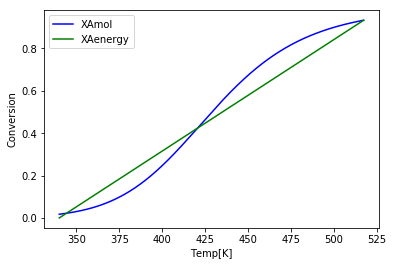

In [96]:
plt.figure(1)
plt.plot(tspan, X1, color='blue', label='XAmol')
plt.plot(tspan, X2, color='green', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

*from the graph, one can see the multiplicity issue*

**Question b)**

In [97]:
Qb = 0.8 #L/s

def CSTR1(varb):
    Xb = varb[0]
    Tb = To - delHrx*Xb/(CpA)
    return[Xb - (Ko/Qb)*exp(-Ea/(R*Tb))*(1-Xb)*V]   

Xcstrb = fsolve(CSTR1,0.9) #test both 0.1 and 0.9 as different guess
Xb = Xcstrb[-1]
print('Max conversion for CSTR=', Xb*100,'%')

Max conversion for CSTR= 97.7163041051656 %


In [98]:
Tb = To - delHrx*Xb/(CpA)
Tb

525.6547893068378

In [99]:
tspanb = linspace(To,Tb,1000)
kb = (Ko/Qb)*exp(-Ea/(R*tspanb))
Xb1 = kb*V/(1+kb*V)
Xb2 = (CpA*(tspanb-To))/-delHrx

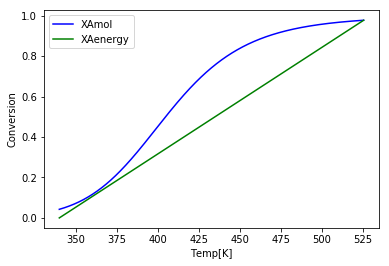

In [100]:
plt.figure(2)
plt.plot(tspanb, Xb1, color='blue', label='XAmol')
plt.plot(tspanb, Xb2, color='green', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

Now one can see multiplicity is no longer an issue. Lowering the flowrate makes the CSTR more stable and increases the conversion. (It also makes logical sense as the residence time naturally increases)

**Question c)**

In [101]:
Toc = 360 #K

def CSTRc(varc):
    Xc = varc[0]
    Tc = Toc - delHrx*Xc/(CpA)
    return[Xc - (Ko/Q)*exp(-Ea/(R*Tc))*(1-Xc)*V]   

Xcstrc = fsolve(CSTRc,0.9) 
Xc = Xcstrc[-1]
Tc = Toc - delHrx*Xc/(CpA)

print('Max conversion for CSTR=', X*100,'%')

Max conversion for CSTR= 93.31877434654574 %


In [102]:
tspanc = linspace(Toc,Tc,1000)
k1c = (Ko/Q)*exp(-Ea/(R*tspanc))
X1c = k1c*V/(1+k1c*V)
X2c = (CpA*(tspanc-Toc))/-delHrx

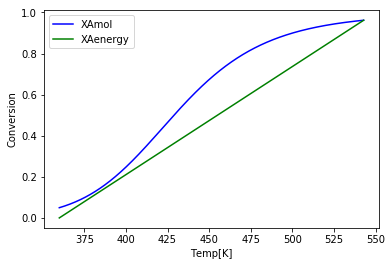

In [103]:
plt.figure(3)
plt.plot(tspanc, X1c, color='blue', label='XAmol')
plt.plot(tspanc, X2c, color='green', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

In [104]:
# We keep changing Toc and rerunning cells until graph shows only one intercept

**Question d)**

In [105]:
Eanew = 60000 #J/mol

def CSTRd(vard):
    Xd = vard[0]
    Td = To - delHrx*Xd/(CpA)
    return[Xd - (Ko/Q)*exp(-Eanew/(R*Td))*(1-Xd)*V]   

Xcstrd = fsolve(CSTRd,0.9) 
Xd = Xcstrd[-1]
Td = To - delHrx*Xd/(CpA)
print(Td)
print('Max conversion for CSTR=', Xd*100,'%')

340.59460743016876
Max conversion for CSTR= 0.3129617107455048 %


In [106]:
tspand = linspace(To,Td,1000)
k1d = (Ko/Q)*exp(-Eanew/(R*tspand))
X1d = k1d*V/(1+k1d*V)
X2d = (CpA*(tspand-To))/-delHrx

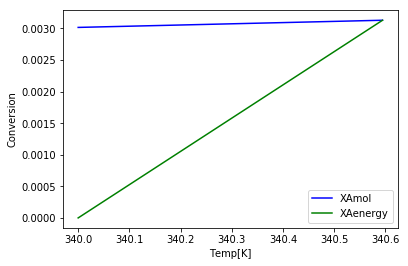

In [107]:
plt.figure(4)
plt.plot(tspand, X1d, color='blue', label='XAmol')
plt.plot(tspand, X2d, color='green', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

Makes sense that increasing the activation energy will reduce the conversion rate.

**Question e)**

The energy balance now no longer equals zero:
$$
\begin{align}
\Sigma_{i} F_{i_{0}}C_{p_{i}}(T - T_{0}) + (-\Delta F_{A})\Delta H^{\circ}_{RX_{A}} &= UA(T_{U} - T) \nonumber \\
F_{A_{0}}C_{p_{A}}(T - T_{0}) + (F_{A_{0}}X_{A})\Delta H^{\circ}_{RX_{A}} &= UAT_{U} - UAT \nonumber \\
T(F_{A_{0}}C_{p_{A}} + UA) - F_{A_{0}}C_{p_{A}}T_{0} + F_{A_{0}}X_{A}\Delta H^{\circ}_{RX_{A}} &= UAT_{U} \nonumber \\
T(F_{A_{0}}C_{p_{A}} + UA) &= - F_{A_{0}}X_{A}\Delta H^{\circ}_{RX_{A}} +  UAT_{U} + F_{A_{0}}C_{p_{A}}T_{0}  \nonumber \\
T &= \dfrac{- F_{A_{0}}\Delta H^{\circ}_{RX_{A}}}{F_{A_{0}}C_{p_{A}} + UA}X_{A} + \dfrac{UAT_{U} + F_{A_{0}}C_{p_{A}}T_{0}}{F_{A_{0}}C_{p_{A}} + UA}
\end{align}
$$

In [108]:
UA = 31.6 #J/(s.K)
Eae = 55000 #J/mol

Tu = 513.9 #keep changing until X=0.93

def CSTRe(vare):
    Xe = vare[0]
    a = CAo*Q*CpA + UA
    Te = (UA*Tu+CAo*Q*CpA*To)/a - CAo*Q*delHrx*Xe/a
    return[Xe - (Ko/Q)*exp(-Eae/(R*Te))*(1-Xe)*V]   

Xcstre = fsolve(CSTRe,0.9) 
Xe = Xcstre[-1]
a = CAo*Q*CpA + UA
Te = (UA*Tu+CAo*Q*CpA*To)/a - CAo*Q*delHrx*Xe/a
print(Te)
print('Max conversion for CSTR=', Xe*100,'%')

515.2989359334316
Max conversion for CSTR= 93.00244620457019 %


In [109]:
tspane = linspace(To,600,1000)

ke = (Ko/Q)*exp(-Eae/(R*tspane))
Xmb = ke*V/(1+ke*V)
a = CAo*Q*CpA + UA
Xeb = CpA*To/delHrx + (UA*Tu - a*tspane)/(CAo*Q*delHrx)
Xad = CpA*(tspane-To)/(-delHrx)

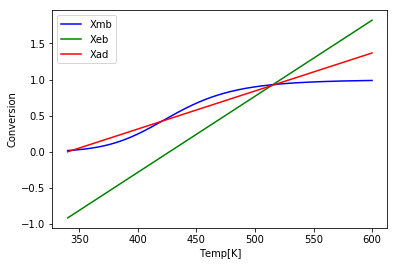

In [110]:
plt.figure(5)
plt.plot(tspane, Xmb, color='blue', label='Xmb')
plt.plot(tspane, Xeb, color='green', label='Xeb')
plt.plot(tspane, Xad, color='red', label='Xad')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

In [111]:
from numpy import linspace, exp
from ipywidgets import interact
import matplotlib.pyplot as plt

R = 8.314 #J/mol.K

def kT(ko1 = 2e7, ko2 = 2e7,  EA1 = 50000, EA2 = 50000,
       Tmin = 273.15, Tmax = 1000):
    T = linspace(Tmin, Tmax, 1000)
    k1 = ko1*exp(-EA1/(R*T))
    k2 = ko2*exp(-EA2/(R*T))
    plt.plot(T, k1, T, k2)
    plt.legend(['k1', 'k2'], loc=2)
    plt.ylabel('k (1/s)')
    plt.xlabel('T (K)')
    
interact(kT, ko1=(1e6, 1e9, 1e5), ko2=(1e6, 1e9, 1e5),
         EA1=(10000, 100000, 1000), EA2=(10000, 100000, 1000),
         Tmin=(150, 1000, 10), Tmax=(1000, 100000, 10))
    

    


interactive(children=(FloatSlider(value=20000000.0, description='ko1', max=1000000000.0, min=1000000.0, step=1…

<function __main__.kT(ko1=20000000.0, ko2=20000000.0, EA1=50000, EA2=50000, Tmin=273.15, Tmax=1000)>